# Step 1: Importing Libraries and Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [3]:
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [4]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Importing sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [6]:
# Importing statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
# Importing leads datasets
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 2: Inspecting the Dataframe

In [8]:
# check the dimensions of the dataframe
lead_df.shape

(9240, 37)

In [9]:
# check the statistical aspects of the dataframe
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# Check the type of each column
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 3: Data Preparation

#### Dropping columns with extremely skewed data

In [12]:
# Check the value counts for columns which seems to have skewed data

skewed_col = ['Do Not Email',
'Do Not Call',
'What matters most to you in choosing a course',
'Search',
'Magazine',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque',
'A free copy of Mastering The Interview']

for i in skewed_col:
    print()
    print(lead_df[i].value_counts())


No     8506
Yes     734
Name: Do Not Email, dtype: int64

No     9238
Yes       2
Name: Do Not Call, dtype: int64

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

No     9226
Yes      14
Name: Search, dtype: int64

No    9240
Name: Magazine, dtype: int64

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

No     9239
Yes       1
Name: X Education Forums, dtype: int64

No     9239
Yes       1
Name: Newspaper, dtype: int64

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

No    9240
Name: Update me on Supply Chain Content, dtype: int64

No    9240
Name: Get updates on DM Content, dtype: int64

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

No     6352
Yes    2888
Name: A free

In [13]:
# Dropping columns with skewed data

skewed_col = ['Do Not Call',
'What matters most to you in choosing a course',
'Search',
'Magazine',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque']

for i in skewed_col:
    lead_df.drop(i,inplace=True, axis=1)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Country                                 6779 non-null   obje

#### Converting binary variables (Yes/No) to 0/1

In [14]:
# Converting Yes to 1 and No to 0 for the retained binary columns

binary_col = ['Do Not Email','A free copy of Mastering The Interview']

lead_df[binary_col] = lead_df[binary_col].apply(lambda x: x.map({'No':0,'Yes':1}))
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,Modified


#### Handle missing values

In [15]:
# Replacement of default "Select" value with "Null"

lead_df = lead_df.replace('Select', np.nan)

In [16]:
# Check columns for null values
lead_df.isnull().sum()/len(lead_df)*100

Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
How did you hear about X Education        78.463203
What is your current occupation           29.112554
Tags                                      36.287879
Lead Quality                              51.590909
Lead Profile                              74.188312
City                                      39.707792
Asymmetrique Activity Index               45.649351
Asymmetrique

In [17]:
# Dropping columns with over 35% null values
lead_df.drop("How did you hear about X Education",inplace=True, axis=1)
lead_df.drop("Tags",inplace=True, axis=1)
lead_df.drop("Lead Quality",inplace=True, axis=1)
lead_df.drop("Lead Profile",inplace=True, axis=1)
lead_df.drop("Asymmetrique Activity Index",inplace=True, axis=1)
lead_df.drop("Asymmetrique Profile Index",inplace=True, axis=1)
lead_df.drop("Asymmetrique Activity Score",inplace=True, axis=1)
lead_df.drop("Asymmetrique Profile Score",inplace=True, axis=1)
lead_df.drop("City",inplace=True, axis=1)
lead_df.drop("Specialization",inplace=True, axis=1)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,0,Modified


In [18]:
# Check columns for null values
lead_df.isnull().sum()/len(lead_df)*100

Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
What is your current occupation           29.112554
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [19]:
# Imputing null records from Lead Source, TotalVisits, Pages Views Per Visit, Last Activity, Country, Occupation
lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median(), inplace=True)
lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median(), inplace=True)
lead_df['Last Activity'].fillna(lead_df['Last Activity'].mode()[0], inplace=True)
lead_df['Lead Source'].fillna(lead_df['Lead Source'].mode()[0], inplace=True)
lead_df['What is your current occupation'].fillna(lead_df['What is your current occupation'].mode()[0], inplace=True)
lead_df['Country'].fillna(lead_df['Country'].mode()[0], inplace=True)
lead_df.isnull().sum()/len(lead_df)*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### Handling outliers

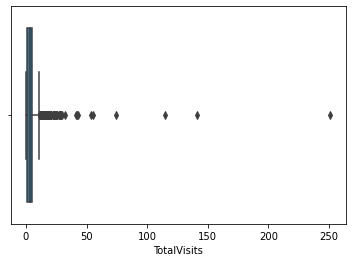

In [20]:
# Visualization of data distribution in "TotalVisits" column

sns.boxplot('TotalVisits', data=lead_df);

99 Percentile value:  17.0


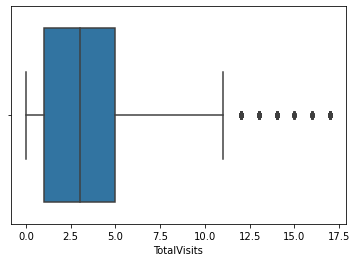

In [21]:
# Capping the value to 99 percentile
print('99 Percentile value: ',np.percentile(lead_df['TotalVisits'],99))
lead_df['TotalVisits'] = np.where(lead_df['TotalVisits'] >np.percentile(lead_df['TotalVisits'],99), np.percentile(lead_df['TotalVisits'],99), lead_df['TotalVisits'])
sns.boxplot('TotalVisits', data=lead_df);

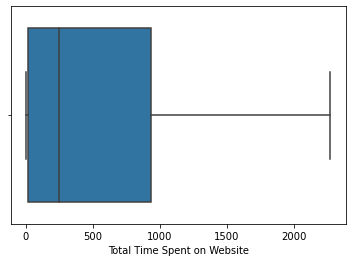

In [22]:
# Visualization of data distribution in "Total Time Spent on Website" column

sns.boxplot('Total Time Spent on Website', data=lead_df);

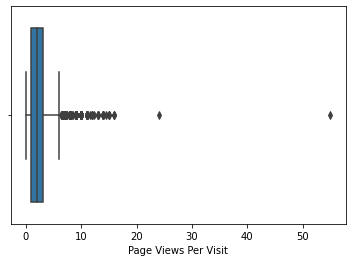

In [23]:
# Visualizing the data distribution of "Page Views Per Visit" column

sns.boxplot('Page Views Per Visit', data=lead_df);

9.0


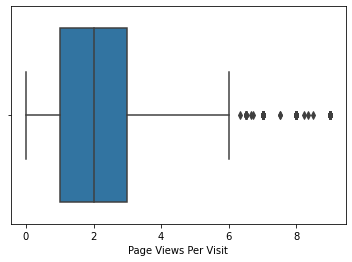

In [24]:
# Capping the value to 99 percentile
print(np.percentile(lead_df['Page Views Per Visit'],99))
lead_df['Page Views Per Visit'] = np.where(lead_df['Page Views Per Visit'] >np.percentile(lead_df['Page Views Per Visit'],99), np.percentile(lead_df['Page Views Per Visit'],99), lead_df['Page Views Per Visit'])
sns.boxplot('Page Views Per Visit', data=lead_df);

#### Handling non source data

In [25]:
# Dropping columns Last Activity and Last Notable Activity since they are updated by Sales Team and not by source
lead_df.drop("Last Activity",inplace=True, axis=1)
lead_df.drop("Last Notable Activity",inplace=True, axis=1)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,India,Unemployed,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,India,Unemployed,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Student,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Unemployed,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,Unemployed,0


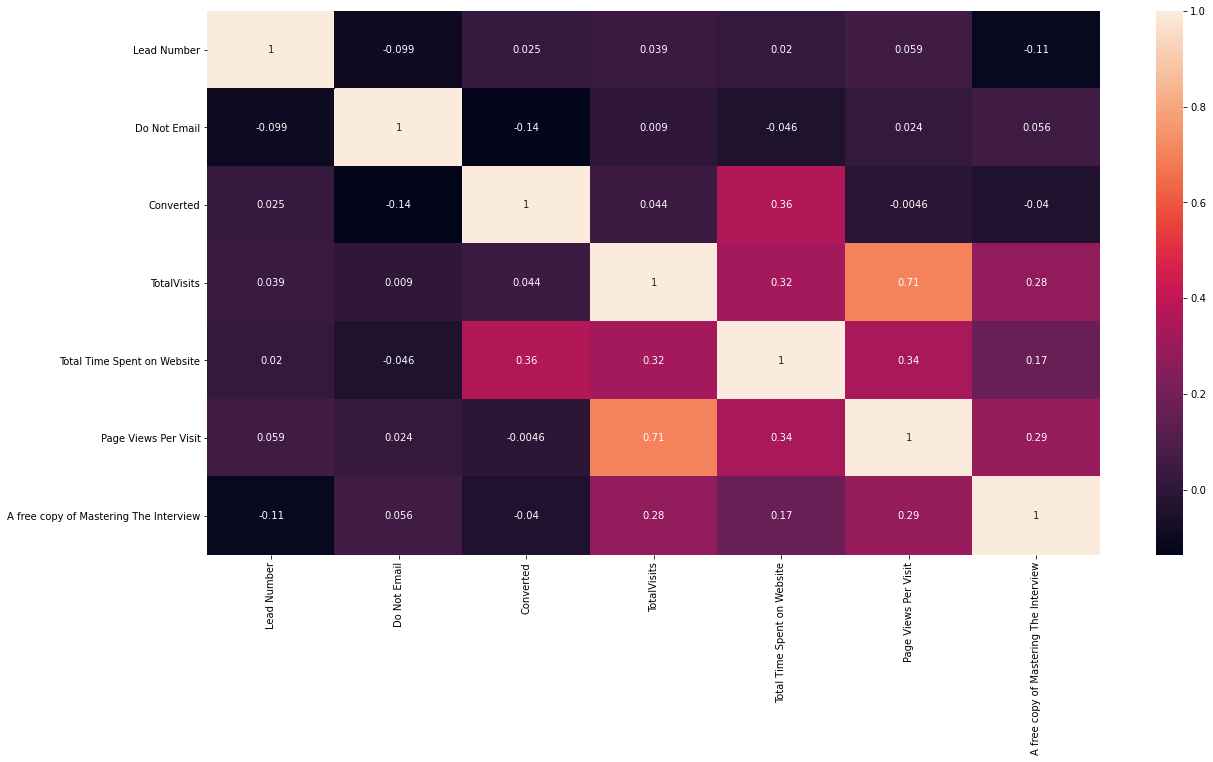

In [26]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

#### Check and prepare categorical data before creating dummies

In [27]:
category_col = ['Lead Origin','Lead Source','Country','What is your current occupation']
for i in category_col:
    print()
    print(lead_df[i].value_counts())


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
NC_EDM                  1
testone                 1
youtubechannel          1
Pay per Click Ads       1
welearnblog_Home        1
blog                    1
Name: Lead Source, dtype: int64

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                   

In [28]:
# Merging category values where individual value count is low
lead_df['Lead Origin'] = lead_df['Lead Origin'].replace(['Lead Add Form','Lead Import', 'Quick Add Form'] , 'Other_Origin')
lead_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Other_Origin                774
Name: Lead Origin, dtype: int64

In [29]:
# Merging category values where individual value count is low
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google', 'Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat', 'Pay per Click Ads','welearnblog_Home', 'NC_EDM', 'WeLearn', 'blog', 'testone', 'youtubechannel'], 'Social_Media')
lead_df['Lead Source'].value_counts()

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Social_Media       345
Name: Lead Source, dtype: int64

In [30]:
# Merging category values where individual value count is low
lead_df['Country'] = lead_df['Country'].replace(['United States', 'United Arab Emirates', 'Singapore', 'Saudi Arabia', 'United Kingdom', 'Australia', 'Qatar', 'Hong Kong', 'Bahrain', 'Oman', 'France', 'unknown', 'South Africa', 'Canada', 'Nigeria', 'Germany', 'Kuwait', 'Sweden', 'Belgium', 'Bangladesh', 'China', 'Ghana', 'Asia/Pacific Region', 'Italy', 'Netherlands', 'Philippines', 'Uganda', 'Indonesia', 'Kenya', 'Liberia', 'Vietnam', 'Denmark', 'Russia', 'Sri Lanka', 'Switzerland', 'Tanzania', 'Malaysia'], 'Other_country')
lead_df['Country'].value_counts()

India            8953
Other_country     287
Name: Country, dtype: int64

In [31]:
# Merging category values where individual value count is low
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(['Housewife','Businessman'], 'Other')
lead_df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

#### Create Dummies for categorical columns

In [32]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,India,Unemployed,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,India,Unemployed,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,India,Student,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,India,Unemployed,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,India,Unemployed,0


In [33]:
# Creating dummy variables for the remaining categorical variables
lo = pd.get_dummies(lead_df["Lead Origin"], prefix="Lead_Origin")
lo = lo.drop(['Lead_Origin_Other_Origin'], 1)
ls = pd.get_dummies(lead_df["Lead Source"], prefix="Lead_Source")
ls = ls.drop(['Lead_Source_Social_Media'], 1)
country = pd.get_dummies(lead_df["Country"], prefix="Country")
country = country.drop(['Country_Other_country'], 1)
co = pd.get_dummies(lead_df["What is your current occupation"], prefix="CO")
co = co.drop(['CO_Other'], 1)

# Adding the results to the master dataframe
lead_df = pd.concat([lead_df,lo], axis=1)
lead_df = pd.concat([lead_df,ls], axis=1)
lead_df = pd.concat([lead_df,country], axis=1)
lead_df = pd.concat([lead_df,co], axis=1)

# Deleting original categorical columns

for i in category_col:
    lead_df.drop(i,inplace=True, axis=1)

lead_df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Country_India,CO_Student,CO_Unemployed,CO_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,1,0,0,0,1,0,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,1,0,0,0,0,1,0,1,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,0,1,1,0,0,0,0,1,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,0,1,1,0,0,0,0,1,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,0,1,0,1,0,0,0,1,0,1,0


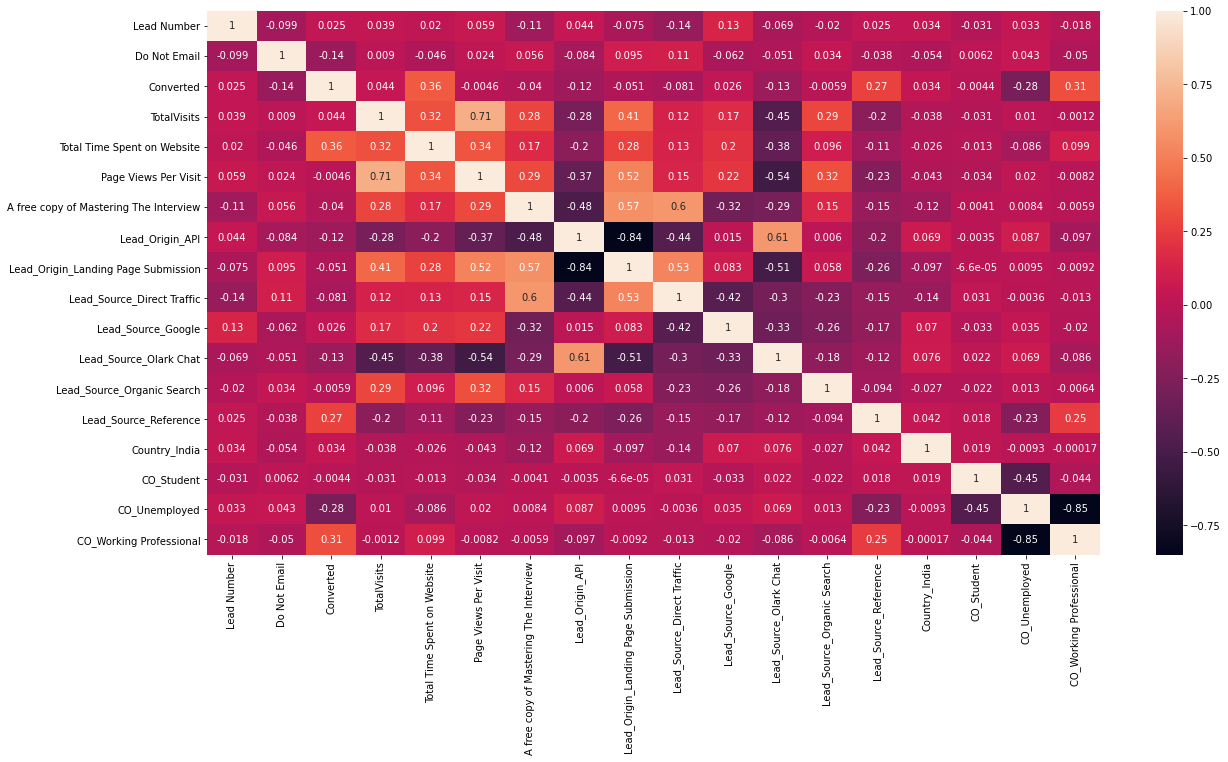

In [34]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

# Step 4: Test-Train Split

In [35]:
# Putting feature variable to X
X = lead_df.drop(['Prospect ID','Lead Number','Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Country_India,CO_Student,CO_Unemployed,CO_Working Professional
0,0,0.0,0,0.0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,5.0,674,2.5,0,1,0,0,0,0,1,0,1,0,1,0
2,0,2.0,1532,2.0,1,0,1,1,0,0,0,0,1,1,0,0
3,0,1.0,305,1.0,0,0,1,1,0,0,0,0,1,0,1,0
4,0,2.0,1428,1.0,0,0,1,0,1,0,0,0,1,0,1,0


In [36]:
lead_df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Country_India,CO_Student,CO_Unemployed,CO_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,1,0,0,0,1,0,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,1,0,0,0,0,1,0,1,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,0,1,1,0,0,0,0,1,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,0,1,1,0,0,0,0,1,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,0,1,0,1,0,0,0,1,0,1,0


In [37]:
# Putting response variable to y
y = lead_df[['Prospect ID','Lead Number','Converted']]

y.head()

,Prospect ID,Lead Number,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1


In [38]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 5: Feature Scaling

In [39]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Country_India,CO_Student,CO_Unemployed,CO_Working Professional
1871,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,1,0,0,1,0,1,0
6795,0,0.205373,0.005716,-0.503379,1,0,1,1,0,0,0,0,1,0,1,0
3516,0,0.512365,-0.691418,0.092260,0,1,0,0,0,1,0,0,1,0,1,0
8105,0,0.512365,1.365219,1.364995,0,0,1,0,1,0,0,0,1,0,1,0
3934,0,-1.022595,-0.885371,-1.180474,0,1,0,0,0,1,0,0,1,0,1,0


In [40]:
### Checking the Lead Conversion Rate
conversion = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
conversion

38.53896103896104

We have almost 38% lead conversion rate

# Step 6: Feature Selection Using RFE

In [41]:
logreg = LogisticRegression()

In [42]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train['Converted'])

In [43]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True])

In [44]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead_Origin_API', True, 1),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Source_Direct Traffic', True, 1),
 ('Lead_Source_Google', True, 1),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 2),
 ('Lead_Source_Reference', True, 1),
 ('Country_India', True, 1),
 ('CO_Student', True, 1),
 ('CO_Unemployed', True, 1),
 ('CO_Working Professional', True, 1)]

In [45]:
col = list(X_train.columns[rfe.support_])

In [46]:
X_train.columns[~rfe.support_]

Index(['Lead_Source_Organic Search'], dtype='object')

# Step 7: Model Building

##### Assessing the model with StatsModels

In [47]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3062.0
Date:                Mon, 17 May 2021   Deviance:                       6124.0
Time:                        22:47:54   Pearson chi2:                 8.08e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.6370      0.578      4.560      0.000       1.504       3.770
Do Not Email                              -1.2548      0.152     -8.240      0.000      -1.553      -0.956
TotalVisits                                0.2014      0.044      4.631      0.000       0.116       0.287
Total Time Spent on Website                1.0820      0.037     29.085      0.000       1.009       1.155
Page Views Per Visit                      -0.0993      0.051     -1.958      0.050      -0.199     9.8e-05
A free copy of Mastering The Interview    -0.0119      0.098     -0.122      0.903      -0.203       0.179
Lead_Origin_API                           -3.3125      0.230    -14.378      0.000      -3.764      -2.861
Lead_Origin_Landing Page Submission       -3.2527      0.240    -13.571      0.000      -3.723      -2.783
Lead_Source_Direct Traffic                -0.1549      0.117     -1.319      0.187      -0.385       0.075
Lead_Source_Google                         0.1854      0.107      1.738      0.082      -0.024       0.394
Lead_Source_Olark Chat                     0.8857      0.148      5.986      0.000       0.596       1.176
Lead_Source_Reference                      0.6490      0.275      2.360      0.018       0.110       1.188
Country_India                              0.1467      0.197      0.744      0.457      -0.240       0.533
CO_Student                                -0.4096      0.545     -0.751      0.453      -1.478       0.659
CO_Unemployed                             -0.6377      0.503     -1.268      0.205      -1.623       0.348
CO_Working Professional                    2.2348      0.532      4.199      0.000       1.192       3.278
==========================================================================================================
"""

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,CO_Unemployed,54.83
11,Country_India,29.73
6,Lead_Origin_Landing Page Submission,27.13
5,Lead_Origin_API,18.29
14,CO_Working Professional,5.75
9,Lead_Source_Olark Chat,4.11
8,Lead_Source_Google,3.78
7,Lead_Source_Direct Traffic,3.71
10,Lead_Source_Reference,3.26
4,A free copy of Mastering The Interview,2.96


In [49]:
col.remove('A free copy of Mastering The Interview')
col

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead_Origin_API',
 'Lead_Origin_Landing Page Submission',
 'Lead_Source_Direct Traffic',
 'Lead_Source_Google',
 'Lead_Source_Olark Chat',
 'Lead_Source_Reference',
 'Country_India',
 'CO_Student',
 'CO_Unemployed',
 'CO_Working Professional']

In [50]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3062.0
Date:                Mon, 17 May 2021   Deviance:                       6124.0
Time:                        22:47:55   Pearson chi2:                 8.08e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.6357      0.578      4.558      0.000       1.502       3.769
Do Not Email                           -1.2543      0.152     -8.239      0.000      -1.553      -0.956
TotalVisits                             0.2009      0.043      4.642      0.000       0.116       0.286
Total Time Spent on Website             1.0819      0.037     29.089      0.000       1.009       1.155
Page Views Per Visit                   -0.0992      0.051     -1.957      0.050      -0.199       0.000
Lead_Origin_API                        -3.3142      0.230    -14.409      0.000      -3.765      -2.863
Lead_Origin_Landing Page Submission    -3.2580      0.236    -13.822      0.000      -3.720      -2.796
Lead_Source_Direct Traffic             -0.1574      0.116     -1.361      0.173      -0.384       0.069
Lead_Source_Google                      0.1894      0.101      1.866      0.062      -0.010       0.388
Lead_Source_Olark Chat                  0.8877      0.147      6.035      0.000       0.599       1.176
Lead_Source_Reference                   0.6496      0.275      2.363      0.018       0.111       1.188
Country_India                           0.1477      0.197      0.749      0.454      -0.239       0.534
CO_Student                             -0.4100      0.545     -0.752      0.452      -1.479       0.659
CO_Unemployed                          -0.6387      0.503     -1.270      0.204      -1.624       0.347
CO_Working Professional                 2.2340      0.532      4.198      0.000       1.191       3.277
=======================================================================================================
"""

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,CO_Unemployed,54.65
10,Country_India,29.70
5,Lead_Origin_Landing Page Submission,25.99
4,Lead_Origin_API,18.20
13,CO_Working Professional,5.73
8,Lead_Source_Olark Chat,4.06
6,Lead_Source_Direct Traffic,3.60
7,Lead_Source_Google,3.43
9,Lead_Source_Reference,3.25
3,Page Views Per Visit,2.62


In [52]:
col.remove('Country_India')
col

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead_Origin_API',
 'Lead_Origin_Landing Page Submission',
 'Lead_Source_Direct Traffic',
 'Lead_Source_Google',
 'Lead_Source_Olark Chat',
 'Lead_Source_Reference',
 'CO_Student',
 'CO_Unemployed',
 'CO_Working Professional']

In [53]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3062.3
Date:                Mon, 17 May 2021   Deviance:                       6124.6
Time:                        22:47:55   Pearson chi2:                 8.08e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.7870      0.543      5.137      0.000       1.724       3.850
Do Not Email                           -1.2581      0.152     -8.268      0.000      -1.556      -0.960
TotalVisits                             0.2006      0.043      4.637      0.000       0.116       0.285
Total Time Spent on Website             1.0821      0.037     29.094      0.000       1.009       1.155
Page Views Per Visit                   -0.0984      0.051     -1.941      0.052      -0.198       0.001
Lead_Origin_API                        -3.3209      0.230    -14.447      0.000      -3.771      -2.870
Lead_Origin_Landing Page Submission    -3.2650      0.236    -13.859      0.000      -3.727      -2.803
Lead_Source_Direct Traffic             -0.1611      0.116     -1.394      0.163      -0.388       0.065
Lead_Source_Google                      0.1941      0.101      1.915      0.055      -0.005       0.393
Lead_Source_Olark Chat                  0.8945      0.147      6.092      0.000       0.607       1.182
Lead_Source_Reference                   0.6498      0.275      2.363      0.018       0.111       1.189
CO_Student                             -0.4105      0.546     -0.752      0.452      -1.480       0.659
CO_Unemployed                          -0.6419      0.503     -1.275      0.202      -1.628       0.344
CO_Working Professional                 2.2288      0.533      4.184      0.000       1.185       3.273
=======================================================================================================
"""

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,CO_Unemployed,33.74
5,Lead_Origin_Landing Page Submission,25.88
4,Lead_Origin_API,18.12
8,Lead_Source_Olark Chat,4.05
12,CO_Working Professional,3.98
6,Lead_Source_Direct Traffic,3.59
7,Lead_Source_Google,3.42
9,Lead_Source_Reference,3.22
3,Page Views Per Visit,2.62
1,TotalVisits,2.02


In [55]:
col.remove('CO_Student')
col

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead_Origin_API',
 'Lead_Origin_Landing Page Submission',
 'Lead_Source_Direct Traffic',
 'Lead_Source_Google',
 'Lead_Source_Olark Chat',
 'Lead_Source_Reference',
 'CO_Unemployed',
 'CO_Working Professional']

In [56]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3062.6
Date:                Mon, 17 May 2021   Deviance:                       6125.2
Time:                        22:47:55   Pearson chi2:                 8.09e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.4413      0.285      8.574      0.000       1.883       2.999
Do Not Email                           -1.2581      0.152     -8.273      0.000      -1.556      -0.960
TotalVisits                             0.2014      0.043      4.657      0.000       0.117       0.286
Total Time Spent on Website             1.0828      0.037     29.121      0.000       1.010       1.156
Page Views Per Visit                   -0.0985      0.051     -1.943      0.052      -0.198       0.001
Lead_Origin_API                        -3.3210      0.230    -14.446      0.000      -3.772      -2.870
Lead_Origin_Landing Page Submission    -3.2661      0.236    -13.863      0.000      -3.728      -2.804
Lead_Source_Direct Traffic             -0.1610      0.116     -1.394      0.163      -0.388       0.065
Lead_Source_Google                      0.1932      0.101      1.907      0.056      -0.005       0.392
Lead_Source_Olark Chat                  0.8931      0.147      6.082      0.000       0.605       1.181
Lead_Source_Reference                   0.6525      0.275      2.373      0.018       0.114       1.191
CO_Unemployed                          -0.2952      0.198     -1.495      0.135      -0.682       0.092
CO_Working Professional                 2.5757      0.263      9.789      0.000       2.060       3.091
=======================================================================================================
"""

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,CO_Unemployed,19.21
5,Lead_Origin_Landing Page Submission,16.98
4,Lead_Origin_API,11.91
8,Lead_Source_Olark Chat,4.04
6,Lead_Source_Direct Traffic,3.59
7,Lead_Source_Google,3.41
11,CO_Working Professional,2.69
3,Page Views Per Visit,2.60
9,Lead_Source_Reference,2.26
1,TotalVisits,2.02


In [58]:
col.remove('CO_Unemployed')
col

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead_Origin_API',
 'Lead_Origin_Landing Page Submission',
 'Lead_Source_Direct Traffic',
 'Lead_Source_Google',
 'Lead_Source_Olark Chat',
 'Lead_Source_Reference',
 'CO_Working Professional']

In [59]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3063.7
Date:                Mon, 17 May 2021   Deviance:                       6127.4
Time:                        22:47:55   Pearson chi2:                 8.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.1483      0.206     10.428      0.000       1.745       2.552
Do Not Email                           -1.2577      0.152     -8.268      0.000      -1.556      -0.960
TotalVisits                             0.2017      0.043      4.665      0.000       0.117       0.286
Total Time Spent on Website             1.0830      0.037     29.129      0.000       1.010       1.156
Page Views Per Visit                   -0.0983      0.051     -1.941      0.052      -0.198       0.001
Lead_Origin_API                        -3.3175      0.230    -14.436      0.000      -3.768      -2.867
Lead_Origin_Landing Page Submission    -3.2630      0.236    -13.855      0.000      -3.725      -2.801
Lead_Source_Direct Traffic             -0.1565      0.115     -1.356      0.175      -0.383       0.070
Lead_Source_Google                      0.1935      0.101      1.911      0.056      -0.005       0.392
Lead_Source_Olark Chat                  0.8972      0.147      6.114      0.000       0.610       1.185
Lead_Source_Reference                   0.6672      0.275      2.429      0.015       0.129       1.206
CO_Working Professional                 2.8626      0.180     15.884      0.000       2.509       3.216
=======================================================================================================
"""

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead_Origin_Landing Page Submission,5.88
4,Lead_Origin_API,4.12
8,Lead_Source_Olark Chat,4.03
6,Lead_Source_Direct Traffic,3.59
7,Lead_Source_Google,3.41
3,Page Views Per Visit,2.58
1,TotalVisits,2.02
2,Total Time Spent on Website,1.25
9,Lead_Source_Reference,1.22
10,CO_Working Professional,1.18


In [61]:
col.remove('Lead_Source_Direct Traffic')
col

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead_Origin_API',
 'Lead_Origin_Landing Page Submission',
 'Lead_Source_Google',
 'Lead_Source_Olark Chat',
 'Lead_Source_Reference',
 'CO_Working Professional']

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3064.6
Date:                Mon, 17 May 2021   Deviance:                       6129.2
Time:                        22:47:56   Pearson chi2:                 8.13e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.1501      0.206     10.439      0.000       1.746       2.554
Do Not Email                           -1.2615      0.152     -8.287      0.000      -1.560      -0.963
TotalVisits                             0.2069      0.043      4.807      0.000       0.123       0.291
Total Time Spent on Website             1.0815      0.037     29.111      0.000       1.009       1.154
Page Views Per Visit                   -0.0843      0.050     -1.703      0.089      -0.181       0.013
Lead_Origin_API                        -3.3906      0.224    -15.155      0.000      -3.829      -2.952
Lead_Origin_Landing Page Submission    -3.3816      0.219    -15.441      0.000      -3.811      -2.952
Lead_Source_Google                      0.2856      0.076      3.783      0.000       0.138       0.434
Lead_Source_Olark Chat                  0.9875      0.131      7.524      0.000       0.730       1.245
Lead_Source_Reference                   0.6850      0.274      2.496      0.013       0.147       1.223
CO_Working Professional                 2.8595      0.180     15.876      0.000       2.506       3.212
=======================================================================================================
"""

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead_Source_Olark Chat,3.16
4,Lead_Origin_API,3.03
3,Page Views Per Visit,2.46
1,TotalVisits,2.00
6,Lead_Source_Google,1.90
5,Lead_Origin_Landing Page Submission,1.83
2,Total Time Spent on Website,1.25
8,Lead_Source_Reference,1.21
9,CO_Working Professional,1.18
0,Do Not Email,1.11


In [64]:
col.remove('Page Views Per Visit')
col

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Lead_Origin_API',
 'Lead_Origin_Landing Page Submission',
 'Lead_Source_Google',
 'Lead_Source_Olark Chat',
 'Lead_Source_Reference',
 'CO_Working Professional']

In [65]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3066.1
Date:                Mon, 17 May 2021   Deviance:                       6132.1
Time:                        22:47:56   Pearson chi2:                 8.20e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.2023      0.204     10.804      0.000       1.803       2.602
Do Not Email                           -1.2565      0.152     -8.256      0.000      -1.555      -0.958
TotalVisits                             0.1693      0.037      4.566      0.000       0.097       0.242
Total Time Spent on Website             1.0795      0.037     29.087      0.000       1.007       1.152
Lead_Origin_API                        -3.4445      0.222    -15.538      0.000      -3.879      -3.010
Lead_Origin_Landing Page Submission    -3.4605      0.214    -16.143      0.000      -3.881      -3.040
Lead_Source_Google                      0.2841      0.075      3.767      0.000       0.136       0.432
Lead_Source_Olark Chat                  1.0462      0.127      8.251      0.000       0.798       1.295
Lead_Source_Reference                   0.6881      0.274      2.507      0.012       0.150       1.226
CO_Working Professional                 2.8553      0.180     15.857      0.000       2.502       3.208
=======================================================================================================
"""

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead_Origin_API,3.03
6,Lead_Source_Olark Chat,2.94
5,Lead_Source_Google,1.90
4,Lead_Origin_Landing Page Submission,1.70
1,TotalVisits,1.42
2,Total Time Spent on Website,1.25
8,CO_Working Professional,1.18
7,Lead_Source_Reference,1.17
0,Do Not Email,1.11


In [67]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.209995
6795    0.228419
3516    0.298249
8105    0.642548
3934    0.209995
4844    0.974490
3297    0.135248
8071    0.995706
987     0.329743
7423    0.760645
dtype: float64

In [68]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20999528, 0.22841887, 0.298249  , 0.64254822, 0.20999528,
       0.97448992, 0.13524766, 0.99570625, 0.32974316, 0.76064475])

##### Creating a dataframe with the actual converted flag and the predicted probabilities|

In [69]:
# Creating dataframe with predicted values, probabilities and Lead numbers
y_train_pred_final = pd.DataFrame({'Prospect ID':y_train['Prospect ID'],'Conversion':y_train['Converted'], 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Prospect ID,Conversion,Conversion_Prob
1871,f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.209995
6795,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.228419
3516,db308a34-ade6-4f0d-9779-586c5be188c7,0,0.298249
8105,1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.642548
3934,6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.209995


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.25 else 0

In [70]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.25 else 0)

# Let's see the head
y_train_pred_final.head()

,Prospect ID,Conversion,Conversion_Prob,predicted
1871,f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.209995,0
6795,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.228419,0
3516,db308a34-ade6-4f0d-9779-586c5be188c7,0,0.298249,1
8105,1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.642548,1
3934,6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.209995,0


In [71]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3087  915]
 [ 537 1929]]


In [72]:
# Predicted     not converted    converted
# Actual
# not converted        3087            915
# converted             537           1929  

In [73]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.7755102040816326


In [74]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Prospect ID,Conversion,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.209995,0,1,1,1,0,0,0,0,0,0,0
6795,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.228419,0,1,1,1,0,0,0,0,0,0,0
3516,db308a34-ade6-4f0d-9779-586c5be188c7,0,0.298249,1,1,1,1,0,0,0,0,0,0,0
8105,1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.642548,1,1,1,1,1,1,1,1,0,0,0
3934,6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.209995,0,1,1,1,0,0,0,0,0,0,0


In [75]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.440012  0.991484  0.100200
0.2   0.2  0.641156  0.905515  0.478261
0.3   0.3  0.793445  0.762368  0.812594
0.4   0.4  0.798392  0.712895  0.851074
0.5   0.5  0.787570  0.639092  0.879060
0.6   0.6  0.771800  0.551906  0.907296
0.7   0.7  0.750464  0.439578  0.942029
0.8   0.8  0.719697  0.308597  0.973013
0.9   0.9  0.683828  0.179238  0.994753


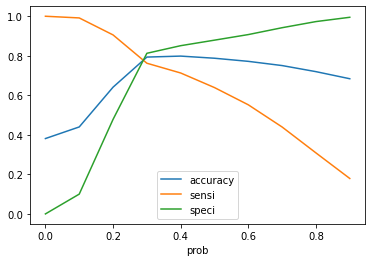

In [76]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [77]:
# Accuracy value of the final model

print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.7755102040816326


In [78]:
# Recall(Sensitivity) value of the final model

print(metrics.recall_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.7822384428223844


# Step 8: Making predictions on the test set

In [79]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [80]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Reference,CO_Working Professional
4269,0,1.433341,0.964504,1,0,0,0,0,0
2376,0,-1.022595,-0.885371,0,0,0,0,1,0
7766,0,0.512365,-0.777416,1,0,1,0,0,1
9199,0,-1.022595,-0.885371,1,0,0,1,0,0
4359,0,-1.022595,-0.885371,0,0,0,0,1,0


In [81]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [82]:
y_test_pred = res.predict(X_test_sm)

In [83]:
y_test_pred[:10]

4269    0.510423
2376    0.853400
7766    0.758549
9199    0.209995
4359    0.853400
9186    0.358415
1631    0.539374
8963    0.197550
8007    0.219674
5324    0.163693
dtype: float64

In [84]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [85]:
# Let's see the head
y_pred_1.head()

,0
4269,0.510423
2376,0.853400
7766,0.758549
9199,0.209995
4359,0.853400


In [86]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [87]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [88]:
y_pred_final.head()

,Prospect ID,Lead Number,Converted,0
4269,dd53b3eb-ae22-474c-b872-48b05bbe180b,619003,1,0.510423
2376,7a960b03-466c-4e36-bf12-b755fc77a0b1,636884,1,0.853400
7766,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,590281,1,0.758549
9199,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,579892,0,0.209995
4359,f7ed6c72-7d36-413c-b2e0-414213c4ceef,617929,1,0.853400


In [89]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [90]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Lead Number,Converted,Conversion_Prob
4269,dd53b3eb-ae22-474c-b872-48b05bbe180b,619003,1,0.510423
2376,7a960b03-466c-4e36-bf12-b755fc77a0b1,636884,1,0.853400
7766,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,590281,1,0.758549
9199,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,579892,0,0.209995
4359,f7ed6c72-7d36-413c-b2e0-414213c4ceef,617929,1,0.853400


In [91]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [92]:
y_pred_final.head()

,Prospect ID,Lead Number,Converted,Conversion_Prob,final_predicted
4269,dd53b3eb-ae22-474c-b872-48b05bbe180b,619003,1,0.510423,1
2376,7a960b03-466c-4e36-bf12-b755fc77a0b1,636884,1,0.853400,1
7766,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,590281,1,0.758549,1
9199,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,579892,0,0.209995,0
4359,f7ed6c72-7d36-413c-b2e0-414213c4ceef,617929,1,0.853400,1


In [93]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7662337662337663

In [94]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1272,  405],
       [ 243,  852]], dtype=int64)

In [95]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [96]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7780821917808219

In [97]:
# Let us calculate specificity
TN / float(TN+FP)

0.7584973166368515

In [98]:
y_pred_final['Score'] = round(y_pred_final['Conversion_Prob'] * 100,0)

In [99]:
y_pred_final.head()

,Prospect ID,Lead Number,Converted,Conversion_Prob,final_predicted,Score
4269,dd53b3eb-ae22-474c-b872-48b05bbe180b,619003,1,0.510423,1,51.0
2376,7a960b03-466c-4e36-bf12-b755fc77a0b1,636884,1,0.853400,1,85.0
7766,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,590281,1,0.758549,1,76.0
9199,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,579892,0,0.209995,0,21.0
4359,f7ed6c72-7d36-413c-b2e0-414213c4ceef,617929,1,0.853400,1,85.0


In [100]:
res.params

const                                  2.202337
Do Not Email                          -1.256546
TotalVisits                            0.169341
Total Time Spent on Website            1.079498
Lead_Origin_API                       -3.444542
Lead_Origin_Landing Page Submission   -3.460546
Lead_Source_Google                     0.284136
Lead_Source_Olark Chat                 1.046174
Lead_Source_Reference                  0.688108
CO_Working Professional                2.855265
dtype: float64